In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np
import seaborn as sns

In [7]:
df=pd.read_csv("housing.csv")

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


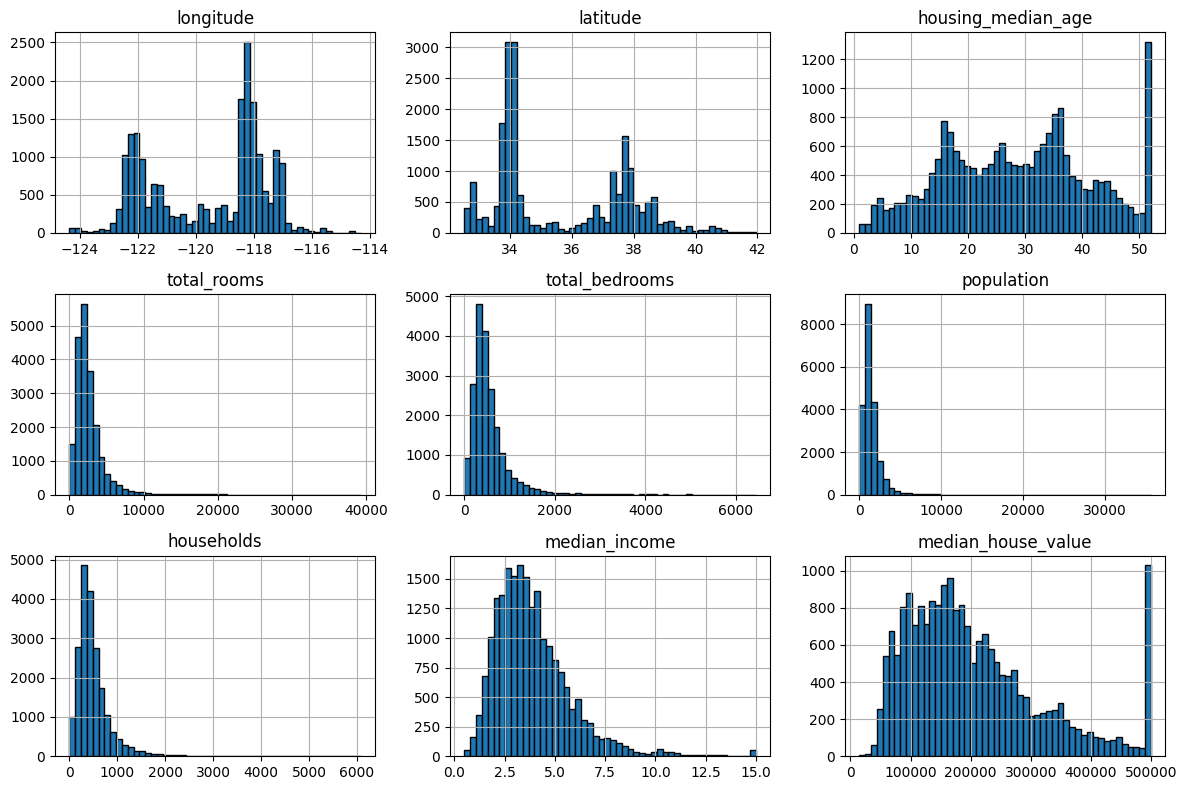

In [10]:
df.hist(figsize=(12, 8), bins=50, edgecolor="black")
plt.tight_layout()
plt.show()

In [11]:
housing_selected = df[['median_income', 'median_house_value']].copy()
train_set_random, test_set_random = train_test_split(housing_selected, test_size=0.2, random_state=42)
print("Random Split:")
print("Random Train Set (first 5 rows):")
train_set_random.head()

Random Split:
Random Train Set (first 5 rows):


,median_income,median_house_value
14196,3.2596,103000.0
8267,3.8125,382100.0
17445,4.1563,172600.0
14265,1.9425,93400.0
2271,3.5542,96500.0


In [12]:
print("Random Test Set (first 5 rows):")
test_set_random.head()

Random Test Set (first 5 rows):


,median_income,median_house_value
20046,1.6812,47700.0
3024,2.5313,45800.0
15663,3.4801,500001.0
20484,5.7376,218600.0
9814,3.7250,278000.0


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assume df is your full DataFrame
# Step 1: Create the income category based on 'median_house_value'
df["income_cat"] = pd.cut(
    df["median_house_value"],
    bins=[0, 100000, 200000, 300000, 400000, np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Step 2: Perform stratified sampling using StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index].copy()
    strat_test_set = df.loc[test_index].copy()

# Step 3: Separate predictors and target
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"]

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"]

# Step 4: Drop income_cat from final datasets
for dataset in (X_train, X_test):
    dataset.drop("income_cat", axis=1, inplace=True)

# Now X_train, X_test, y_train, y_test are stratified and ready for modeling


<Axes: xlabel='longitude', ylabel='latitude'>

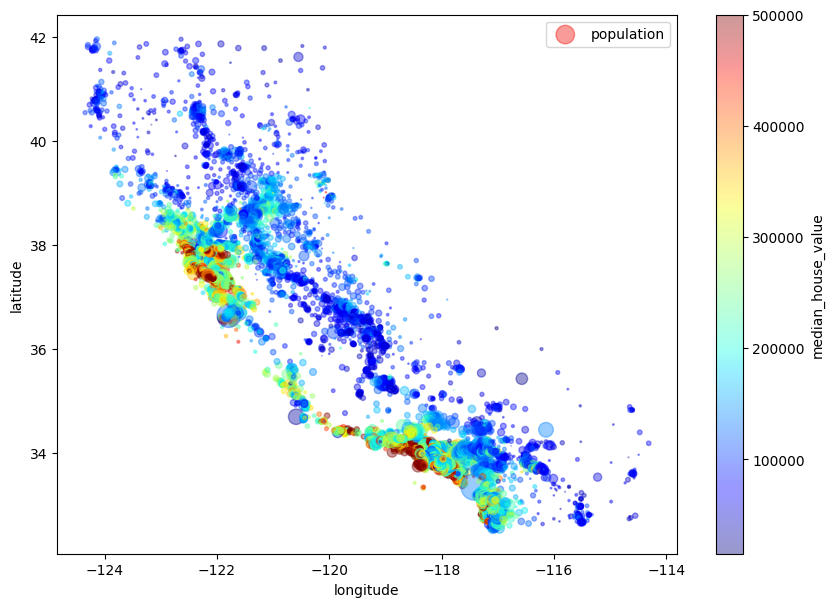

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude",
alpha=0.4, s=df["population"]/100, label="population",
figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
colorbar=True)

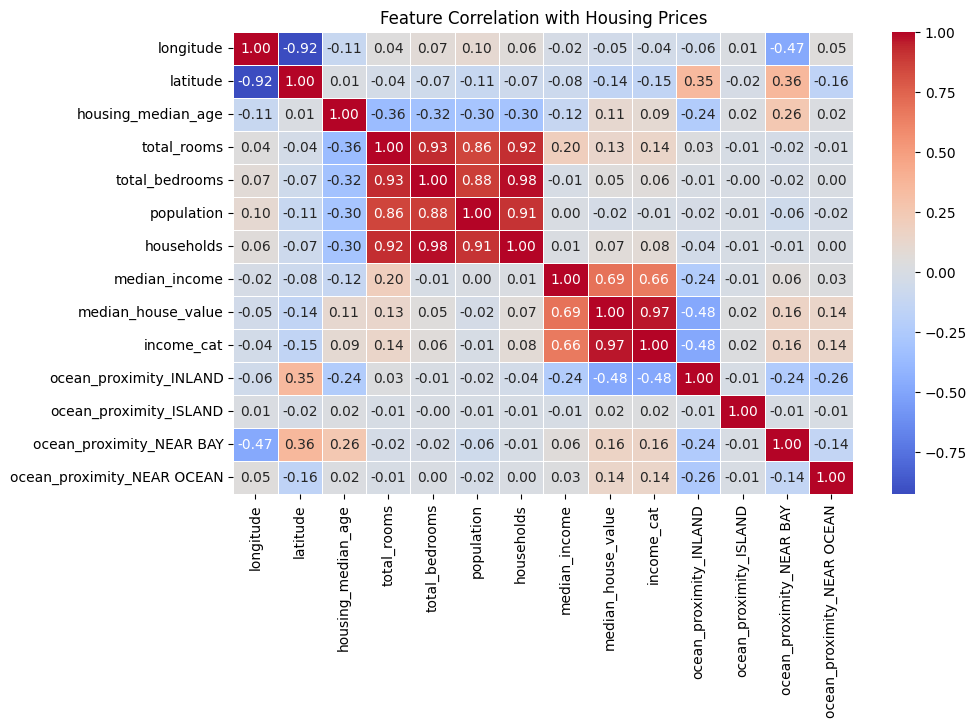

In [15]:

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Housing Prices")
plt.show()

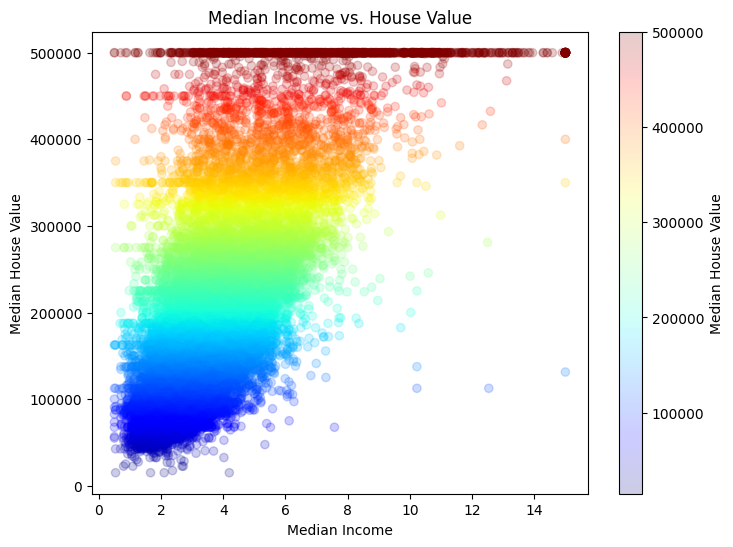

In [16]:

plt.figure(figsize=(8, 6))
plt.scatter(df["median_income"], df["median_house_value"],
            alpha=0.2, c=df["median_house_value"], cmap="jet")
plt.colorbar(label="Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs. House Value")
plt.show()

In [17]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

corr_matrix = df_encoded.corr()

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df_encoded.corr()["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
income_cat,0.967584
median_income,0.688075
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416


In [18]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["bedrooms_per_room"].fillna(df["bedrooms_per_room"].median(), inplace=True)

df.isnull().sum()


<ipython-input-18-0a2618eab6d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)
<ipython-input-18-0a2618eab6d4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [19]:

housing_encoded = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

housing_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,6.238137,0.155797,2.109842,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,8.288136,0.129516,2.802260,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,6.281853,0.172096,2.181467,False,False,True,False


In [20]:

num_features = ["longitude", "latitude", "housing_median_age", "total_rooms",
                "total_bedrooms", "population", "households", "median_income"]

housing_scaled = housing_encoded.copy()
housing_scaled[num_features] = (housing_encoded[num_features] - housing_encoded[num_features].min()) / \
                               (housing_encoded[num_features].max() - housing_encoded[num_features].min())

housing_scaled.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,5,6.984127,0.146591,2.555556,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,4,6.238137,0.155797,2.109842,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,4,8.288136,0.129516,2.802260,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,4,5.817352,0.184458,2.547945,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,4,6.281853,0.172096,2.181467,False,False,True,False


In [21]:

def preprocess_housing_data(df):

    df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

    df["rooms_per_household"] = df["total_rooms"] / df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
    df["population_per_household"] = df["population"] / df["households"]

    df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

    num_features = ["longitude", "latitude", "housing_median_age", "total_rooms",
                    "total_bedrooms", "population", "households", "median_income"]
    df[num_features] = (df[num_features] - df[num_features].min()) / (df[num_features].max() - df[num_features].min())

    return df

housing_prepared = preprocess_housing_data(df)

housing_prepared.head()


<ipython-input-21-b8c58cb5fc09>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,5,6.984127,0.146591,2.555556,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,4,6.238137,0.155797,2.109842,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,4,8.288136,0.129516,2.802260,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,4,5.817352,0.184458,2.547945,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,4,6.281853,0.172096,2.181467,False,False,True,False
